# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## Import Libraries

In [100]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
import pandas as pd
import json
import zipfile
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

I am deeply passionate about movies. In our previous project, we worked with a movie dataset, but it lacked depth and detail. In this project, I am excited to work with a more comprehensive dataset, merging the previous one with IMDb data from Kaggle. Our goal is to provide a thorough insight into the world of cinema. By cleaning and analyzing this dataset, we aim to reveal the significance of cinema, such as identifying the top-grossing films and the highest-rated films according to IMDb scores.

Research question:
- Can we effectively combine two datasets while maintaining data integrity?
- Research on the revenue of the 10 highest-revenue?
- Research on the 10 highest-IMDb movies?


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Gather data by accessing APIs

The first dataset provides detailed information about revenue, movie titles, actors, and IMDb codes for various films. 

The second dataset offers an incredibly detailed perspective on IMDb information for movies, categorized by genre.

By merging and analyzing these two datasets, we will gain a profound insight into the world of cinema.

#### **Dataset 1**

Type: CSV File

Method: The data was gathered using the "Downloading files manually" method.

Dataset variables:

*   Variable 1: budget - The movie budget
*   Variable 2: overview - The movie descriptions
*   Variable 3: genres - Genres of the movie
*   Variable 4: release_date - The movie release date
*   Variable 5: release_year - The move release year
*   etc...

In [102]:
df1 = pd.read_csv('./data/tmdb-movies.csv')

In [103]:
df1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


#### Dataset 2

Type: CSV File

Method: The data was gathered using the "API Token Command" method from Kaggle's source

Dataset variables:

*   *Variable 1:* movie_id - The movie identification 
*   *Variable 2:* movie_name - The movie's name
*   *Variable 3:* year - The movie' release year
*   etc...

In [104]:
!kaggle datasets download -d rajugc/imdb-movies-dataset-based-on-genre

Dataset URL: https://www.kaggle.com/datasets/rajugc/imdb-movies-dataset-based-on-genre
License(s): CC-BY-NC-SA-4.0
imdb-movies-dataset-based-on-genre.zip: Skipping, found more recently modified local copy (use --force to force download)


In [105]:
!tar -xf imdb-movies-dataset-based-on-genre.zip -C ./data

In [106]:
movie_genre = "action"
# This is a dataset filtered by movie genres.
# Please check the 'data' folder and select the genre you want to analyze.
# I've created this method so you can have a specific insight into each genre in a very dynamic and intelligent way.

In [107]:
df2 = pd.read_csv('./data/'+movie_genre+'.csv')

In [108]:
df2

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52447,tt26743984,Suicide 2,1999,NaN,54 min,"Action, Drama, Horror",NaN,Matt awakens after trying to end his own life ...,"Brandon Womeldorff, \nMatt Brassfield",/name/nm13690776/,"Matt Hoffman, \nMatt Brassfield, \nBrandon Wom...","/name/nm1565857/,/name/nm7326486/,/name/nm1565...",NaN,NaN
52448,tt26744184,Chaos,2023,NaN,NaN,"Action, Thriller",NaN,Add a Plot,"Aditi Prabhudeva, \nSiddu Moolimani, \nAkshith...",/name/nm8898786/,NaN,"/name/nm7465869/,/name/nm12502668/,/name/nm545...",NaN,NaN
52449,tt26744484,Revolver Lily,NaN,NaN,NaN,"Action, Adventure",NaN,"Takes place in 1924 and centres on Yuri, who k...",Isao Yukisada,/name/nm0950834/,NaN,NaN,NaN,NaN
52450,tt26744765,The Wing,NaN,NaN,NaN,Action,NaN,The most secret and elite Special Forces unit ...,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

### Quality Issue 1:

In [109]:
df1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [111]:
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [112]:
df1.sample()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6019,159370,tt2624672,0.096356,0,0,R'ha,Dave Masterson|Dave Masterson,http://vimeo.com/57148705#,Kaleb Lechowski,NaN,...,An alien soldier is interrogated by some sort ...,6,Science Fiction,NaN,1/10/13,12,6.3,2013,0.0,0.0


In [113]:
df1.shape

(10866, 21)

In [114]:
df2.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN


In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52452 entries, 0 to 52451
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     52452 non-null  object 
 1   movie_name   52451 non-null  object 
 2   year         44193 non-null  object 
 3   certificate  13668 non-null  object 
 4   runtime      32530 non-null  object 
 5   genre        52452 non-null  object 
 6   rating       29448 non-null  float64
 7   description  52452 non-null  object 
 8   director     47819 non-null  object 
 9   director_id  47819 non-null  object 
 10  star         43212 non-null  object 
 11  star_id      44621 non-null  object 
 12  votes        29450 non-null  float64
 13  gross(in $)  2760 non-null   float64
dtypes: float64(3), object(11)
memory usage: 5.6+ MB


In [116]:
df2.describe()

,rating,votes,gross(in $)
count,29448.000000,2.945000e+04,2.760000e+03
mean,5.697755,1.159384e+04,4.166888e+07
std,1.359132,7.039375e+04,8.033689e+07
min,1.100000,5.000000e+00,7.000000e+00
25%,4.800000,2.925000e+01,5.459445e+05
50%,5.800000,1.320000e+02,1.090365e+07
75%,6.600000,9.440000e+02,4.631759e+07
max,10.000000,2.675531e+06,9.366622e+08


In [117]:
df2.sample()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
18290,tt0080893,Hotwire,1980,PG,95 min,"Action, Comedy",4.4,A hard drinking old man and a cocky street-wis...,Frank Q. Dobbs,/name/nm0229638/,"George Kennedy, \nStrother Martin, \nJohn Terr...","/name/nm0001421/,/name/nm0001510/,/name/nm0856...",54.0,NaN


In [118]:
df2.shape

(52452, 14)

Issue and justification: The data related to dates (`release_date`,`year`) should be formatted as dates, not as objects.


### Quality Issue 2:

In [119]:
df1.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [120]:
df1.duplicated().sum()

1

In [121]:
df2.isnull().sum()

movie_id           0
movie_name         1
year            8259
certificate    38784
runtime        19922
genre              0
rating         23004
description        0
director        4633
director_id     4633
star            9240
star_id         7831
votes          23002
gross(in $)    49692
dtype: int64

Issue and justification: In general, on a high level, the data still contains a lot of 'null' values, and along with that, there is a significant amount of duplicate data. We need to clean up those data types by examining and assessing the appropriateness of the data.

### Tidiness Issue 1:

In [122]:
df1.cast.head()

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2    Shailene Woodley|Theo James|Kate Winslet|Ansel...
3    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4    Vin Diesel|Paul Walker|Jason Statham|Michelle ...
Name: cast, dtype: object

In [123]:
df1.genres.head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

Issue and justification: The data contains special characters like '|', which should be replaced with ',' for better readability and user-friendliness.

### Tidiness Issue 2: 

In [124]:
df1.budget_adj.head()

0    1.379999e+08
1    1.379999e+08
2    1.012000e+08
3    1.839999e+08
4    1.747999e+08
Name: budget_adj, dtype: float64

In [125]:
df1.revenue_adj.head()

0    1.392446e+09
1    3.481613e+08
2    2.716190e+08
3    1.902723e+09
4    1.385749e+09
Name: revenue_adj, dtype: float64

Issue and justification: The data contains numbers in the 'e+' format, which are represented in scientific notation. However, when applied to analytical data, it is not reasonable and makes it difficult for users to understand. It should be formatted as normal numbers.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [126]:
df1_cleaned = df1.copy()
df2_cleaned = df2.copy()

### **Quality Issue 1: Wrong Data Type**

Issue and justification: The data related to dates (release_date,year) should be formatted as dates, not as objects.

In [127]:
df1_cleaned['release_date'] = pd.to_datetime(df1_cleaned['release_date'], errors='coerce')
df1_cleaned['release_year'] = pd.to_datetime(df1_cleaned['release_date'],  errors='coerce')
df2_cleaned['year'] = pd.to_datetime(df2_cleaned['year'],  errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_9156\1204282826.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1_cleaned['release_date'] = pd.to_datetime(df1_cleaned['release_date'], errors='coerce')


In [128]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [129]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52452 entries, 0 to 52451
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   movie_id     52452 non-null  object        
 1   movie_name   52451 non-null  object        
 2   year         42284 non-null  datetime64[ns]
 3   certificate  13668 non-null  object        
 4   runtime      32530 non-null  object        
 5   genre        52452 non-null  object        
 6   rating       29448 non-null  float64       
 7   description  52452 non-null  object        
 8   director     47819 non-null  object        
 9   director_id  47819 non-null  object        
 10  star         43212 non-null  object        
 11  star_id      44621 non-null  object        
 12  votes        29450 non-null  float64       
 13  gross(in $)  2760 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(10)
memory usage: 5.6+ MB


Justification: *The data types have been adjusted to their correct types*

### **Quality Issue 2: Handling Null Values And Duplicate Entries**

Issue and justification: In general, on a high level, the data still contains a lot of 'null' values, and along with that, there is a significant amount of duplicate data. We need to clean up those data types by examining and assessing the appropriateness of the data.

In [130]:
# At this step, we will process the data by removing duplicate and N/A values.
df1_cleaned.drop_duplicates(inplace=True)
df1_cleaned.dropna(inplace=True)
df2_cleaned.drop_duplicates(inplace=True)
df2_cleaned.dropna(inplace=True)
# After cleaning up the erroneous values, the data will be more ready for analysis.

In [131]:
df1_cleaned.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [132]:
df1_cleaned.duplicated().sum()

0

In [133]:
df2_cleaned.isnull().sum()

movie_id       0
movie_name     0
year           0
certificate    0
runtime        0
genre          0
rating         0
description    0
director       0
director_id    0
star           0
star_id        0
votes          0
gross(in $)    0
dtype: int64

In [134]:
df2_cleaned.duplicated().sum()

0

Justification: *The non-conforming data has been removed, resulting in no null values and duplicate entries*

### **Tidiness Issue 1: Standardizing The Data**

Issue and justification: The data contains special characters like '|', which should be replaced with ',' for better readability and user-friendliness.

In [135]:
# Standardized data
df1_cleaned['cast'] = df1_cleaned['cast'].str.replace('|', ',')
df1_cleaned['production_companies'] = df1_cleaned['production_companies'].str.replace('|', ',')
df1_cleaned['genres'] = df1_cleaned['genres'].str.replace('|', ',')

In [136]:
df1_cleaned.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",2015-06-09,5562,6.5,2015-06-09,1.379999e+08,1.392446e+09


In [137]:
# Standardized data
df2_cleaned['star'] = df2_cleaned['star'].str.replace('\\', ',')
df2_cleaned['star'] = df2_cleaned['star'].str.replace('\n', '')

In [138]:
df2_cleaned.star

12       Chadwick Boseman, Michael B. Jordan, Lupita Ny...
14       Tom Cruise, Tim Robbins, Kelly McGillis, Val K...
15       Sam Worthington, Zoe Saldana, Sigourney Weaver...
20       Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...
23       Timothée Chalamet, Rebecca Ferguson, Zendaya, ...
                               ...                        
33154    Orris L. Johnson, Sean Dungee, Christine Solti...
33808    M.J. Alhabeeb Jr., Devon Whitham, Adam Roach, ...
37565    Scotty Davis, Ethan Martin, Zach Alexander, Ry...
38799    Leon Ames, Luana Walters, Pamela Blake, Malcol...
39178    M.D. Selig, Michael Childers, Lisa Robert, Ric...
Name: star, Length: 2672, dtype: object

Justification: *The part of the dataset containing non-standard characters has been successfully processed.*

### **Tidiness Issue 2: Converting Scientific Notation to Standard Numeric Format**

Issue and justification: The data contains numbers in the 'e+' format, which are represented in scientific notation. However, when applied to analytical data, it is not reasonable and makes it difficult for users to understand. It should be formatted as normal numbers.

In [139]:
# Processing data in "scientific notation form"
df1_cleaned['revenue_adj'] = df1_cleaned['revenue_adj'].apply(lambda x: "{:.2f}".format(x))
df1_cleaned['budget_adj'] = df1_cleaned['budget_adj'].apply(lambda x: "{:.2f}".format(x))

In [140]:
df1_cleaned.budget_adj

0        137999939.28
1        137999939.28
2        101199955.47
3        183999919.04
4        174799923.09
             ...     
10724     41609849.41
10759      1002810.21
10760      9025291.88
10817            0.00
10819            0.00
Name: budget_adj, Length: 1992, dtype: object

In [141]:
df1_cleaned.revenue_adj

0        1392445892.52
1         348161292.49
2         271619025.41
3        1902723129.80
4        1385748801.47
             ...      
10724     487278044.15
10759     233989048.64
10760     471320797.98
10817       1076189.17
10819     260730654.20
Name: revenue_adj, Length: 1992, dtype: object

Justification: *We have completed the processing, yet numbers are still represented in scientific notation. Now, readers of the report will find it easier to understand*

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [142]:
# After cleaning and standardizing the data at this step, we will merge the two datasets.
df1_cleaned = df1_cleaned[['id', 'imdb_id', 'popularity', 'budget', 'original_title', 'cast', 'homepage', 'director', 'overview','genres','revenue_adj']]
df1_cleaned.to_csv('data/df1_cleaned.csv', index=False)
df2_cleaned = df2_cleaned[['movie_id', 'certificate', 'runtime','rating','votes']]
df2_cleaned.to_csv('data/df2_cleaned.csv', index=False)
df_merge = df1_cleaned.merge(df2_cleaned, left_on='imdb_id', right_on='movie_id', how='inner')
df_merge.drop(columns=['id', 'movie_id'], inplace=True)
df_merge

,imdb_id,popularity,budget,original_title,cast,homepage,director,overview,genres,revenue_adj,certificate,runtime,rating,votes
0,tt0369610,32.985763,150000000,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",http://www.jurassicworld.com/,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,"Action,Adventure,Science Fiction,Thriller",1392445892.52,PG-13,124 min,6.9,649327.0
1,tt1392190,28.419936,150000000,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",http://www.madmaxmovie.com/,George Miller,An apocalyptic story set in the furthest reach...,"Action,Adventure,Science Fiction,Thriller",348161292.49,R,120 min,8.1,1013606.0
2,tt2908446,13.112507,110000000,Insurgent,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,"Adventure,Science Fiction,Thriller",271619025.41,PG-13,119 min,6.2,242031.0
3,tt2488496,11.173104,200000000,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,"Action,Adventure,Science Fiction,Fantasy",1902723129.80,PG-13,138 min,7.8,937714.0
4,tt2820852,9.335014,190000000,Furious 7,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",http://www.furious7.com/,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,"Action,Crime,Thriller",1385748801.47,PG-13,137 min,7.1,394578.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,tt0090728,0.960984,25000000,Big Trouble in Little China,"Kurt Russell,Kim Cattrall,Dennis Dun,James Hon...",http://www.theofficialjohncarpenter.com/big-tr...,John Carpenter,When trucker Jack Burton agreed to take his fr...,"Adventure,Fantasy,Action,Comedy",21883470.52,PG-13,99 min,7.2,143980.0
483,tt0070328,1.549139,7000000,Live and Let Die,"Roger Moore,Yaphet Kotto,Jane Seymour,Clifton ...",http://www.mgm.com/view/movie/1130/Live-and-Le...,Guy Hamilton,James Bond must investigate a mysterious murde...,"Adventure,Action,Thriller",794516768.91,PG,121 min,6.7,109903.0
484,tt0059800,1.910465,11000000,Thunderball,"Sean Connery,Claudine Auger,Adolfo Celi,Lucian...",http://www.mgm.com/view/movie/2009/Thunderball/,Terence Young,A criminal organization has obtained two nucle...,"Adventure,Action,Thriller",977153544.47,PG,130 min,6.9,120852.0
485,tt0064757,1.778746,7000000,On Her Majesty's Secret Service,"George Lazenby,Diana Rigg,Telly Savalas,Gabrie...",http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,James Bond tracks archnemesis Ernst Blofeld to...,"Adventure,Action,Thriller",487278044.15,PG,142 min,6.7,94047.0


In [143]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         487 non-null    object 
 1   popularity      487 non-null    float64
 2   budget          487 non-null    int64  
 3   original_title  487 non-null    object 
 4   cast            487 non-null    object 
 5   homepage        487 non-null    object 
 6   director        487 non-null    object 
 7   overview        487 non-null    object 
 8   genres          487 non-null    object 
 9   revenue_adj     487 non-null    object 
 10  certificate     487 non-null    object 
 11  runtime         487 non-null    object 
 12  rating          487 non-null    float64
 13  votes           487 non-null    float64
dtypes: float64(3), int64(1), object(10)
memory usage: 53.4+ KB


In [144]:
df_merge.describe()

,popularity,budget,rating,votes
count,487.000000,4.870000e+02,487.000000,4.870000e+02
mean,2.360222,7.454757e+07,6.498973,2.892858e+05
std,2.839246,6.560422e+07,0.951163,3.385904e+05
min,0.010335,0.000000e+00,2.100000,2.576000e+03
25%,0.902357,2.500000e+07,6.000000,8.667400e+04
50%,1.511663,6.000000e+07,6.500000,1.718550e+05
75%,2.810259,1.140000e+08,7.100000,3.639680e+05
max,32.985763,4.250000e+08,9.000000,2.675531e+06


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [145]:
df_merge

,imdb_id,popularity,budget,original_title,cast,homepage,director,overview,genres,revenue_adj,certificate,runtime,rating,votes
0,tt0369610,32.985763,150000000,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",http://www.jurassicworld.com/,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,"Action,Adventure,Science Fiction,Thriller",1392445892.52,PG-13,124 min,6.9,649327.0
1,tt1392190,28.419936,150000000,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",http://www.madmaxmovie.com/,George Miller,An apocalyptic story set in the furthest reach...,"Action,Adventure,Science Fiction,Thriller",348161292.49,R,120 min,8.1,1013606.0
2,tt2908446,13.112507,110000000,Insurgent,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,"Adventure,Science Fiction,Thriller",271619025.41,PG-13,119 min,6.2,242031.0
3,tt2488496,11.173104,200000000,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,"Action,Adventure,Science Fiction,Fantasy",1902723129.80,PG-13,138 min,7.8,937714.0
4,tt2820852,9.335014,190000000,Furious 7,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",http://www.furious7.com/,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,"Action,Crime,Thriller",1385748801.47,PG-13,137 min,7.1,394578.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,tt0090728,0.960984,25000000,Big Trouble in Little China,"Kurt Russell,Kim Cattrall,Dennis Dun,James Hon...",http://www.theofficialjohncarpenter.com/big-tr...,John Carpenter,When trucker Jack Burton agreed to take his fr...,"Adventure,Fantasy,Action,Comedy",21883470.52,PG-13,99 min,7.2,143980.0
483,tt0070328,1.549139,7000000,Live and Let Die,"Roger Moore,Yaphet Kotto,Jane Seymour,Clifton ...",http://www.mgm.com/view/movie/1130/Live-and-Le...,Guy Hamilton,James Bond must investigate a mysterious murde...,"Adventure,Action,Thriller",794516768.91,PG,121 min,6.7,109903.0
484,tt0059800,1.910465,11000000,Thunderball,"Sean Connery,Claudine Auger,Adolfo Celi,Lucian...",http://www.mgm.com/view/movie/2009/Thunderball/,Terence Young,A criminal organization has obtained two nucle...,"Adventure,Action,Thriller",977153544.47,PG,130 min,6.9,120852.0
485,tt0064757,1.778746,7000000,On Her Majesty's Secret Service,"George Lazenby,Diana Rigg,Telly Savalas,Gabrie...",http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,James Bond tracks archnemesis Ernst Blofeld to...,"Adventure,Action,Thriller",487278044.15,PG,142 min,6.7,94047.0


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* Research on the revenue of the 10 highest-revenue and the 10 highest-IMDb movies

In [146]:
def top_10_revenue(df_merge):
    top_10 = []

    for movie, revenue in zip(df_merge['original_title'], df_merge['revenue_adj']):
        if revenue.replace('.', '', 1).isdigit():
            revenue = float(revenue)
            top_10.append((movie, revenue))

    top_10 = sorted(top_10, key=lambda x: x[1], reverse=True)[:10]

    return top_10
    
top_10_revenue(df_merge)

[('Avatar', 2827123750.41),
 ('Star Wars', 2789712242.28),
 ('Star Wars: The Force Awakens', 1902723129.8),
 ('The Avengers', 1443191435.21),
 ('The Empire Strikes Back', 1424626187.77),
 ('Jurassic World', 1392445892.52),
 ('Jurassic Park', 1388863311.76),
 ('Furious 7', 1385748801.47),
 ('The Lord of the Rings: The Return of the King', 1326278010.48),
 ('Avengers: Age of Ultron', 1292632336.88)]

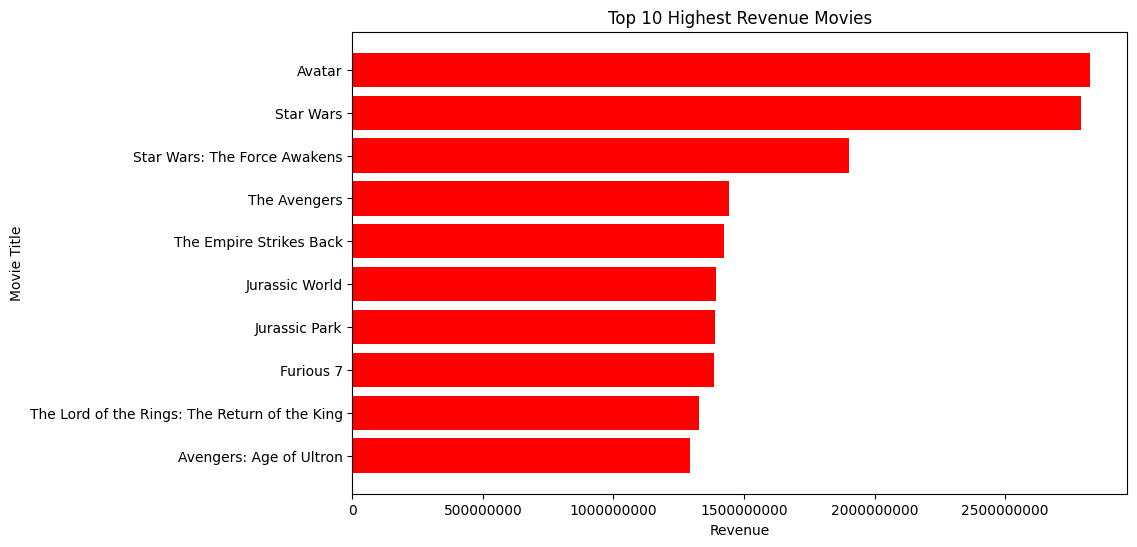

In [147]:
def plot_top_10_revenue(top_10_data):
    movies = [x[0] for x in top_10_data]
    revenues = [x[1] for x in top_10_data]
    plt.figure(figsize=(10, 6))
    plt.barh(movies, revenues, color='red')
    plt.xlabel('Revenue')
    plt.ylabel('Movie Title')
    plt.title('Top 10 Highest Revenue Movies')
    plt.gca().invert_yaxis()  
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

top_10_data = top_10_revenue(df_merge)

plot_top_10_revenue(top_10_data)


*Answer to research question:* Through the chart above, we've seen the top 10 most valuable films in history and gained insights into the great world cinema masterpieces that the previous project couldn't fully address. It's truly wonderful to enjoy these great and immensely valuable films.

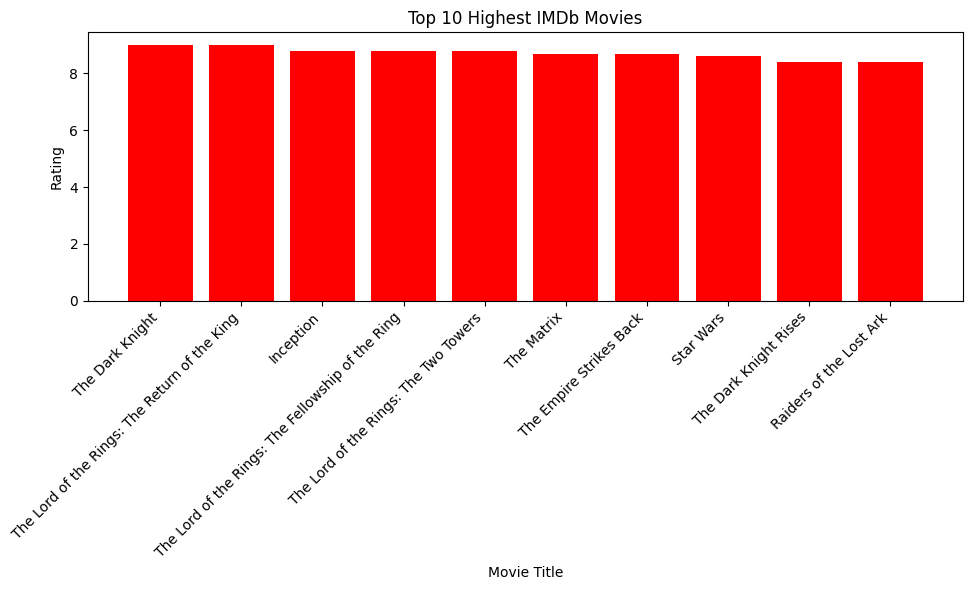

In [148]:
top_10_imdb = df_merge.nlargest(10, 'rating')
plt.figure(figsize=(10, 6))
plt.bar(top_10_imdb['original_title'], top_10_imdb['rating'], color='red')
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.title('Top 10 Highest IMDb Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

*Answer to research question:* Based on the chart above, we can observe the top 10 films with the highest IMDb scores. These films represent the highest IMDb scores within their respective genres. Through this chart, we can visually grasp a glimpse of world cinema.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* Indeed, it would be fascinating to explore the correlation between the IMDb scores and the investment budgets of the films to see if they are directly proportional?